<table align="left" width=100%>
    <tr>
        <td width="1%">
        </td>
        <td>
            <div align="center">
                <font color="blue" size=8px>
                    <b> Medical Expenditure of Employees <br> of a company
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

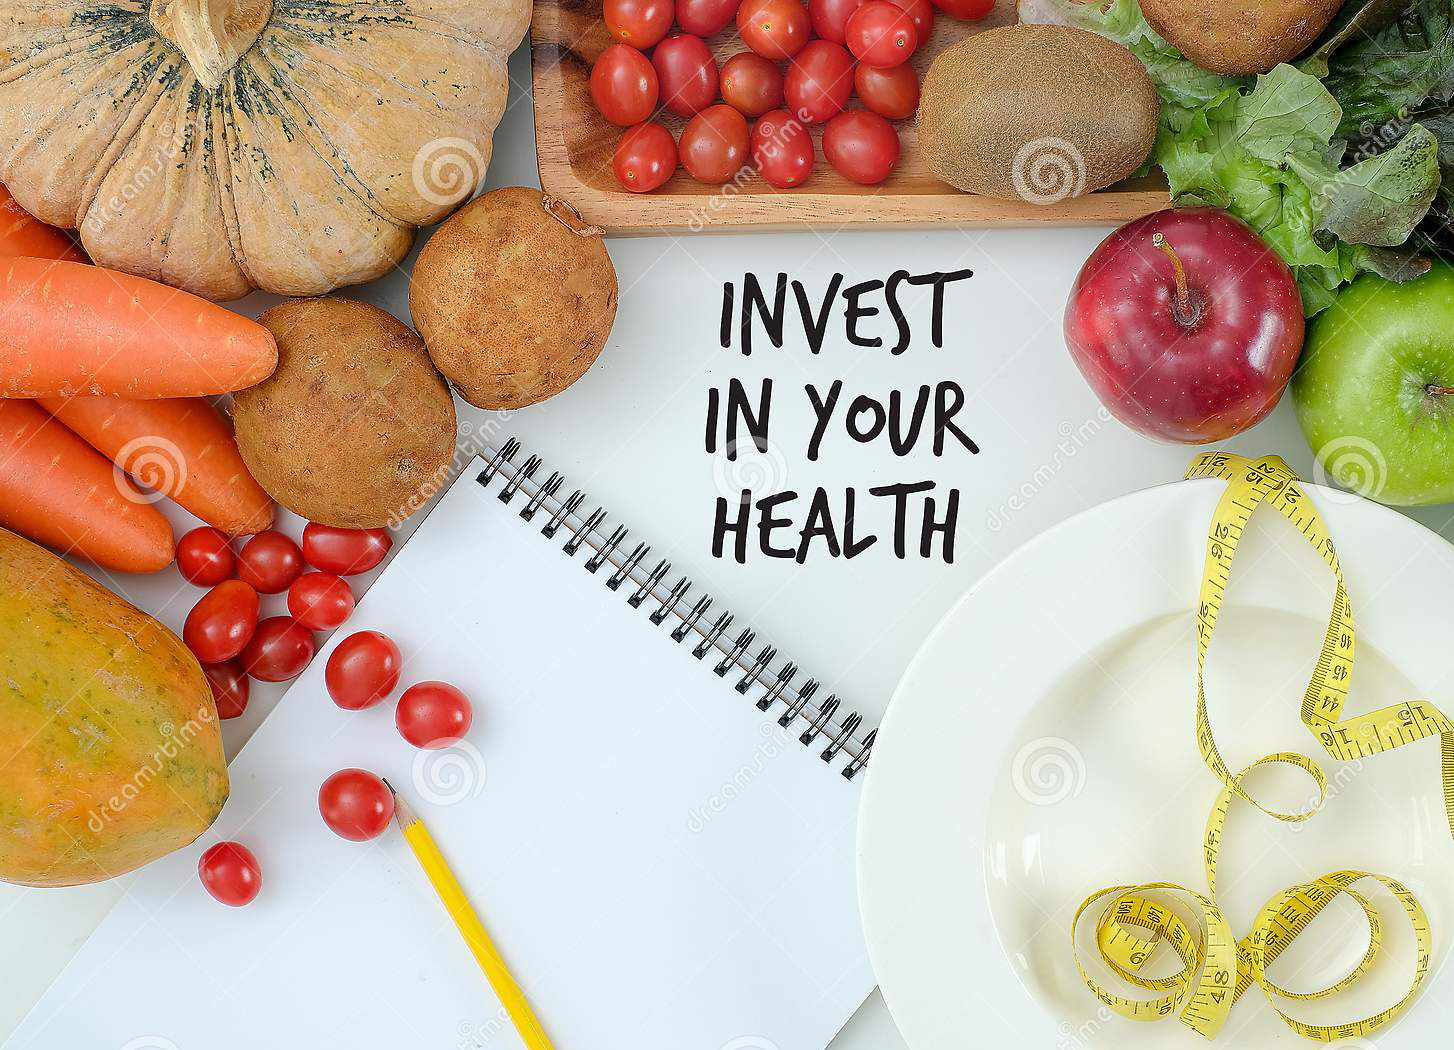

A Company is having its offices across all locations of India. These locations are categorized with respect to zones.  
The company has collected the medical expenditure of all the employees for the year 2019.  The company also collected some other health and family related data of all employees like number of dependents,age, bmi, smoking and alcoholichabits.

### The company has decided to give medical expenditure benefits to their employees for the year 2020

- Problem Statement - Analysis of Medical Expenditure of year 2019 and derive insights

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import plotly.express as px
sns.set_theme(style="white", palette=None)

import warnings

warnings.filterwarnings(action='ignore')

In [2]:
df1 = pd.read_csv("emp_health.csv")
df1.head(5)

id  age     sex     bmi  dependent  alcohol smoke       zone  \
0  i10012   19  female  27.900          0    daily   yes  southwest   
1  i10013   18    male  33.770          1  weekend    no      south   
2  i10014   28    male  33.000          3   rarely    no      south   
3  i10015   33    male  22.705          0    daily    no  northwest   
4  i10016   32    male  28.880          0    party    no  northwest   

   expenditure  
0  16884.92400  
1   1725.55230  
2   4449.46200  
3  21984.47061  
4   3866.85520

In [3]:
df1.tail(5)

id  age     sex    bmi  dependent  alcohol smoke       zone  \
1333  i11345   50    male  30.97          3       no    no       west   
1334  i11346   18  female  31.92          0    daily    no       east   
1335  i11347   18  female  36.85          0  weekend    no  southeast   
1336  i11348   21  female  25.80          0    party    no  southwest   
1337  i11349   61  female  29.07          0       no   yes       west   

      expenditure  
1333   10600.5483  
1334    2205.9808  
1335    1629.8335  
1336    2007.9450  
1337   29141.3603

In [4]:
df1.isnull().sum()

id             0
age            0
sex            0
bmi            0
dependent      0
alcohol        0
smoke          0
zone           0
expenditure    0
dtype: int64

In [5]:
# we can also use df1.dtypes

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1338 non-null   object 
 1   age          1338 non-null   int64  
 2   sex          1338 non-null   object 
 3   bmi          1338 non-null   float64
 4   dependent    1338 non-null   int64  
 5   alcohol      1338 non-null   object 
 6   smoke        1338 non-null   object 
 7   zone         1338 non-null   object 
 8   expenditure  1338 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


In [6]:
df1.describe()

age          bmi    dependent   expenditure
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

### `a) Employees above 50 age & smoke` 
### `b) their average expenditure on health management `

In [5]:
a = df1.query('age > 50 & smoke == "yes"')['expenditure'].mean()

print("The Average expenditure of Employees on health management is {0:0.2f} whose age is above 50 and having smoking habit"
     .format(a))

The Average expenditure of Employees on health management is 38820.22 whose age is above 50 and having smoking habit


### `a) Female employees did not consume alcohol daily`

### `b) Their proportion with respect to total female`

In [8]:
fnotdaily = ((df1['sex'] == 'female') & (df1['alcohol'] != 'daily')).value_counts().loc[True]
fnotdaily

453

In [9]:
total_f = (df1['sex'] == 'female').value_counts().loc[True]
total_f

662

In [13]:
fem_not_daily = (fnotdaily / total_f)*100

print("{0:0.2f}% of female who did not consume alcohol daily".format(fem_not_daily))

68.43% of female who did not consume alcohol daily


### `Zone wise average expenditure of employees on health`

In [10]:
zone_average = df1.groupby('zone')['expenditure'].mean().round(2)
zone_average

zone
east         13774.68
north        14102.58
northeast    13694.72
northwest    12151.70
south        14715.69
southeast    14452.95
southwest    12717.08
west         12183.00
Name: expenditure, dtype: float64

### `Employees of which zone did maximum expenditure on health`

In [11]:
d = '-'.join(list(df1.groupby('zone')['expenditure'].sum().nlargest(1).index))

print('{} zone has maximum expenditure'.format(d))

east zone has maximum expenditure


### `The minimum expenditure done by any employee in organization` 

In [16]:
print("The Employee whose expenditure is minimum is")

df1[df1['expenditure'] == df1['expenditure'].min()]

The Employee whose expenditure is minimum is


id  age   sex    bmi  dependent alcohol smoke       zone  expenditure
940  i10952   18  male  23.21          0   party    no  southeast    1121.8739

### `average expenditure of employees who have 2 or lesser dependents `

In [17]:
c1 = df1['expenditure'][df1['dependent'] <=2].round(2).mean()

print("The average expenditure of employees who have 2 or lesser dependents is {0:0.2f}".format(c1))

The average expenditure of employees who have 2 or lesser dependents is 13040.97


### `Employees below age of 20 years. What is their average BMI `

In [18]:
round(df1['bmi'][(df1['age'] < 20)].mean(),2)

29.97

### `Dataframe "non_smoker" for all non-smoker male employees `

In [12]:
df_non_smoking = df1[(df1['sex'] == 'male') & (df1['smoke'] == 'no')]
df_non_smoking.head(5)

id  age   sex     bmi  dependent  alcohol smoke       zone  expenditure
1  i10013   18  male  33.770          1  weekend    no      south   1725.55230
2  i10014   28  male  33.000          3   rarely    no      south   4449.46200
3  i10015   33  male  22.705          0    daily    no  northwest  21984.47061
4  i10016   32  male  28.880          0    party    no  northwest   3866.85520
8  i10020   37  male  29.830          2    party    no      north   6406.41070

### `Dataframe "non_alcoholic" for all non-alcoholic male employees `

In [13]:
df_non_alcoholic = df1[(df1['sex'] == 'male') & (df1['alcohol'] == 'no')]
df_non_alcoholic.head(6)

id  age   sex     bmi  dependent alcohol smoke       zone  expenditure
18  i10030   56  male  40.300          0      no    no  southwest  10602.38500
24  i10036   37  male  28.025          2      no    no  northwest   6203.90175
28  i10040   23  male  17.385          1      no    no  northwest   2775.19215
37  i10049   26  male  20.800          0      no    no  southwest   2302.30000
38  i10050   35  male  36.670          1      no   yes      north  39774.27630
53  i10065   36  male  34.430          0      no   yes      south  37742.57570

### `Dataframe of "non_smoking alcoholic" `
### `for all non-smoker male employees who consume alcohol`

In [21]:
# Inner joining df1 and non-smoking 

f1 = df1[['id','sex','alcohol','smoke']]

f1_non_smoking = df_non_smoking[['id','sex','alcohol','smoke']]

# Inner join on [id,sex,smoke] 

f3 = pd.merge(f1,f1_non_smoking,on=['id','sex','smoke'],how='inner')

# Removing people who don't consume alcohol

f3 = f3[(f3['alcohol_x'] != 'no') & (f3['alcohol_y'] !='no')]
f3.head()

id   sex alcohol_x smoke alcohol_y
0  i10013  male   weekend    no   weekend
1  i10014  male    rarely    no    rarely
2  i10015  male     daily    no     daily
3  i10016  male     party    no     party
4  i10020  male     party    no     party

In [22]:
f3.drop('alcohol_y',axis=1,inplace=True)

f3.rename(columns={'alcohol_x':'alcohol'},inplace=True)

f3.head()

id   sex  alcohol smoke
0  i10013  male  weekend    no
1  i10014  male   rarely    no
2  i10015  male    daily    no
3  i10016  male    party    no
4  i10020  male    party    no

### `Count for each zone with respect to number of dependent `

In [23]:
df1.groupby(by='zone')['dependent'].count()

zone
east         262
north         70
northeast     74
northwest    145
south         84
southeast    198
southwest    251
west         254
Name: dependent, dtype: int64

## `Classifying the employees into 3 categories.`

### <font color='green'>Underweight</font> : employees whose bmi is below 18.5 bmi   
### <font color='green'> Fit </font> : employees with bmi in the range of 18.5 to 24.9 
### <font color='green'>Overweight </font> : employee with bmi over 24.9 

In [24]:
df1.head()

id  age     sex     bmi  dependent  alcohol smoke       zone  \
0  i10012   19  female  27.900          0    daily   yes  southwest   
1  i10013   18    male  33.770          1  weekend    no      south   
2  i10014   28    male  33.000          3   rarely    no      south   
3  i10015   33    male  22.705          0    daily    no  northwest   
4  i10016   32    male  28.880          0    party    no  northwest   

   expenditure  
0  16884.92400  
1   1725.55230  
2   4449.46200  
3  21984.47061  
4   3866.85520

In [25]:
# adding a column 'bmi category' beside bmi column based on conditions
# we can also use pd.cut()  

conditions = [(df1['bmi'] < 18.5),(df1['bmi'].between(18.5,24.9)),(df1['bmi'] > 24.9)]

category = ['underweight','fit','overweight']

df1.insert(4,'bmi_category',np.select(conditions,category))

In [26]:
df1.head()

id  age     sex     bmi bmi_category  dependent  alcohol smoke  \
0  i10012   19  female  27.900   overweight          0    daily   yes   
1  i10013   18    male  33.770   overweight          1  weekend    no   
2  i10014   28    male  33.000   overweight          3   rarely    no   
3  i10015   33    male  22.705          fit          0    daily    no   
4  i10016   32    male  28.880   overweight          0    party    no   

        zone  expenditure  
0  southwest  16884.92400  
1      south   1725.55230  
2      south   4449.46200  
3  northwest  21984.47061  
4  northwest   3866.85520

### `The Average expenditure of Employees in each BMI category`

In [27]:
category_avg = df1.groupby(by='bmi_category')['expenditure'].agg(np.mean).round(2)
category_avg1 = pd.DataFrame(category_avg)
category_avg1

expenditure
bmi_category             
fit              10379.50
overweight       13936.62
underweight       8852.20

In [28]:
dfbmi = df1.groupby(['bmi_category','sex'])[['expenditure']].mean()
dfbmi = dfbmi.reset_index()
dfbmi

bmi_category     sex   expenditure
0          fit  female  10933.946160
1          fit    male   9772.747038
2   overweight  female  12959.874681
3   overweight    male  14864.695657
4  underweight  female  11012.530054
5  underweight    male   5611.706381

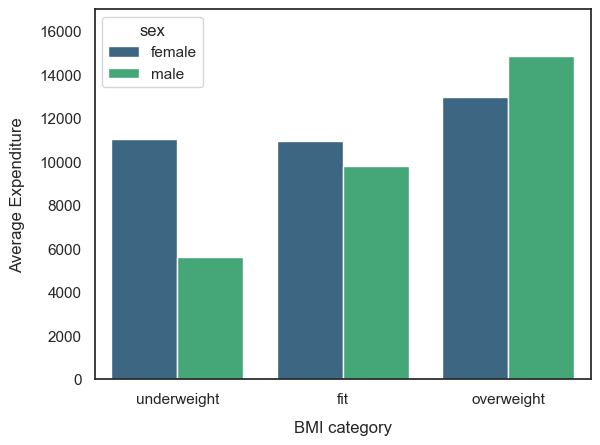

In [51]:
fig = sns.barplot(data=dfbmi,x=dfbmi.bmi_category,y=dfbmi.expenditure,hue='sex',order=['underweight','fit','overweight'],
                 palette='viridis')

fig.set_xlabel('BMI category',fontsize=12,labelpad=10)
fig.set_ylabel('Average Expenditure',fontsize=12,labelpad=10)
fig.set_ylim(top=17000)

plt.show()

- Interesting case of females in underweight & overweight category do have same average expenditure

## `line plot of expenditure against` 

## `1) age` 

## `2) BMI`

In [53]:
g1 = df1.copy()
g2 = g1.groupby(['age','sex'])[['expenditure','sex']].sum('expenditure').round(2)

g2 = g2.reset_index()
g2.head()

age     sex  expenditure
0   18  female    215234.51
1   18    male    273714.50
2   19  female    317189.38
3   19    male    345668.45
4   20  female    102926.85

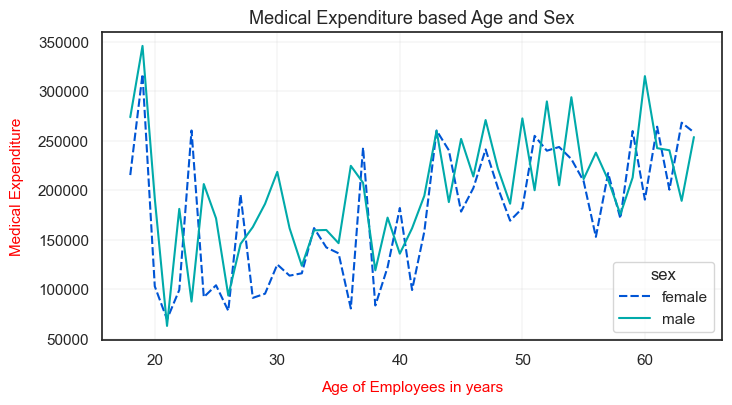

In [77]:
fig,ax = plt.subplots(figsize=(8,4))

sns.set_style('white')
ax = sns.lineplot(data=g2,x='age',y='expenditure',palette='winter',hue='sex',style='sex',style_order=['male','female'],ci=None)

plt.xlabel("Age of Employees in years",fontsize=11.0,color='r',labelpad=10)
plt.ylabel("Medical Expenditure",fontsize=11.0,color='r',labelpad=10)
plt.title("Medical Expenditure based Age and Sex",fontsize=13.0)

start,end = ax.get_xlim()

plt.grid(linewidth=0.2)
plt.show()

- 20-40 Age group is having highest fluctuations compared to other age groups

In [79]:
g1 = df1.copy()
g2 = g1.groupby(['age','sex'])[['expenditure','sex']].mean('expenditure').round(2)
g2.rename(columns={'expenditure':'avg_expenditure'},inplace=True)
g2 = g2.reset_index()
g2.head()

age     sex  avg_expenditure
0   18  female          6522.26
1   18    male          7603.18
2   19  female          9611.80
3   19    male          9876.24
4   20  female          7351.92

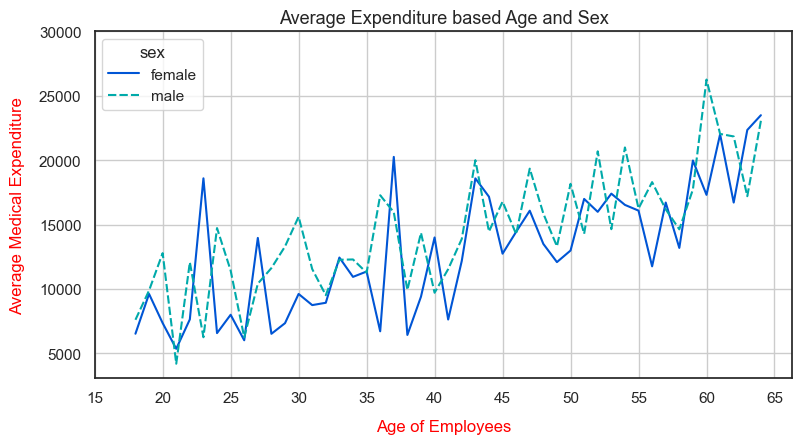

In [82]:
# ci = None (No confidence interval)
# plot-2

plt.figure(figsize=(9,4.5))

sns.lineplot(data=g2,x='age',y='avg_expenditure',palette='winter',hue='sex',style='sex',ci=None)

plt.xlabel("Age of Employees",fontsize=12.0,color='r',labelpad=10)
plt.ylabel("Average Medical Expenditure",fontsize=12.0,color='r',labelpad=10)
plt.xticks(ticks=np.arange(15,70,5),labels=np.arange(15,70,5))
plt.ylim(top=30000)
plt.title("Average Expenditure based Age and Sex",fontsize=13.0)

plt.grid()
plt.show()

- we have a increasing trend in the expenditure of employees
  - a) Trend in male employees is stable
  - b) Trend in female employees is having fluctuations in the age range 20-40

In [106]:
g3 = g1.groupby(['bmi_category'])[['expenditure']].sum()
g3 = g3.reset_index()
g3['expenditure'] = g3['expenditure']/1000000

g3.rename(columns={'expenditure':'exp_in_million'},inplace=True)
g3 = g3.sort_values('exp_in_million')
g3

bmi_category  exp_in_million
2  underweight        0.177044
0          fit        2.304249
1   overweight       15.274532

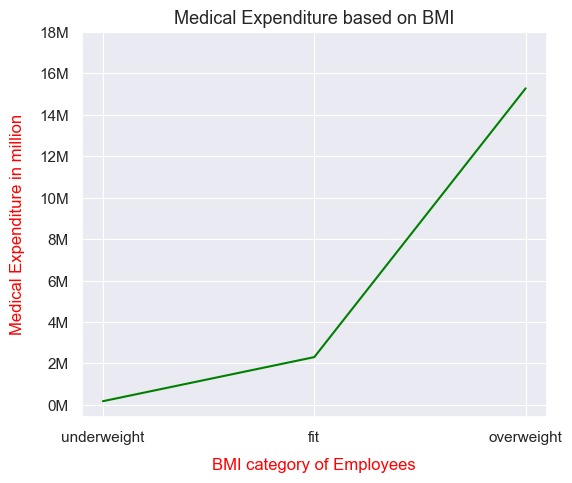

In [169]:
plt.figure(figsize=(6,5))

sns.set_style('dark')
sns.lineplot(data=g3,x='bmi_category',y='exp_in_million',color='green',markers=['o'],
             palette='blue',ci=None,legend=None)

plt.xlabel("BMI category of Employees",fontsize=12.0,color='red',labelpad=10)
plt.ylabel("Medical Expenditure in million",fontsize=12.0,color='r',labelpad=10)
plt.yticks(ticks=np.arange(0,20,2),labels=[str(i)+'M' for i in range(0,20,2)])
plt.title("Medical Expenditure based on BMI",fontsize=13.0)

plt.grid(lw=0.8)
plt.show()

- Over all medical expenditure of overwighing employees is much larger than other two categories

In [36]:
g5 = df1.copy()
g5 = g5.groupby('bmi_category')[['expenditure']].mean()
g5.reset_index(inplace=True)
g5.rename(columns={'expenditure':'mean_expenditure'},inplace=True)
g5

bmi_category  mean_expenditure
0          fit      10379.499732
1   overweight      13936.616823
2  underweight       8852.200585

In [37]:
g6 = df1.groupby(['bmi_category','sex'])[['expenditure']].mean()
g6.reset_index(inplace=True)
g6.rename(columns={'expenditure':'mean_exp'},inplace=True)
g6

bmi_category     sex      mean_exp
0          fit  female  10933.946160
1          fit    male   9772.747038
2   overweight  female  12959.874681
3   overweight    male  14864.695657
4  underweight  female  11012.530054
5  underweight    male   5611.706381

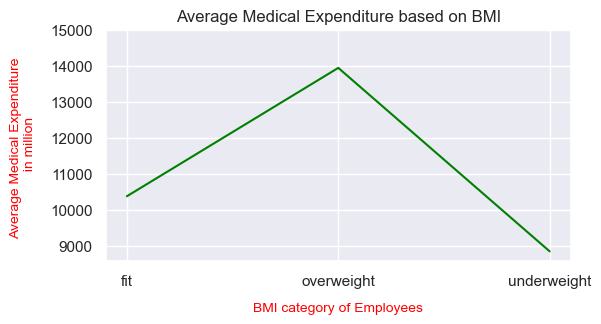

In [38]:
plt.figure(figsize=(6,3))

sns.set_style('dark')
sns.lineplot(data=g5,x='bmi_category',y='mean_expenditure',color='green',markers='*',palette='hot',ci=None,legend=None)

plt.xlabel("BMI category of Employees",fontsize=10.0,color='red',labelpad=10)
plt.ylabel("Average Medical Expenditure \n in million",fontsize=10.0,color='r',labelpad=10)
plt.ylim(top=15000)
plt.title("Average Medical Expenditure based on BMI",fontsize=12.0)

plt.grid()
plt.show()

- Employees who are obese, thier expenditure is larger compared to underweight & overweight

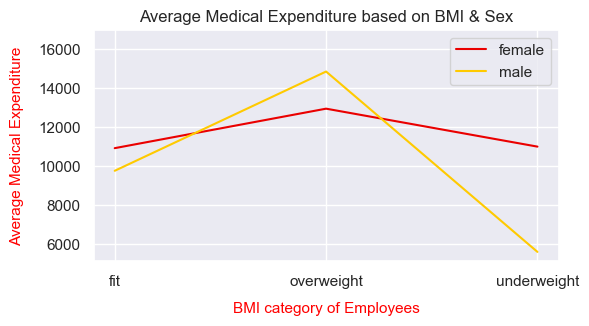

In [96]:
plt.figure(figsize=(6,3))

sns.set_style('dark')
sns.lineplot(data=g6,x='bmi_category',y='mean_exp',color='green',hue='sex',
             markers='*',palette='hot',ci=None,legend=None)

plt.xlabel("BMI category of Employees",fontsize=11.0,color='red',labelpad=10)
plt.ylabel("Average Medical Expenditure",fontsize=11.0,color='red',labelpad=10)
plt.ylim(top=17000)
plt.title("Average Medical Expenditure based on BMI & Sex",fontsize=12.0)

plt.legend(g6.sex)
plt.grid()
plt.show()

### `Zone wise Medical Expenditure`

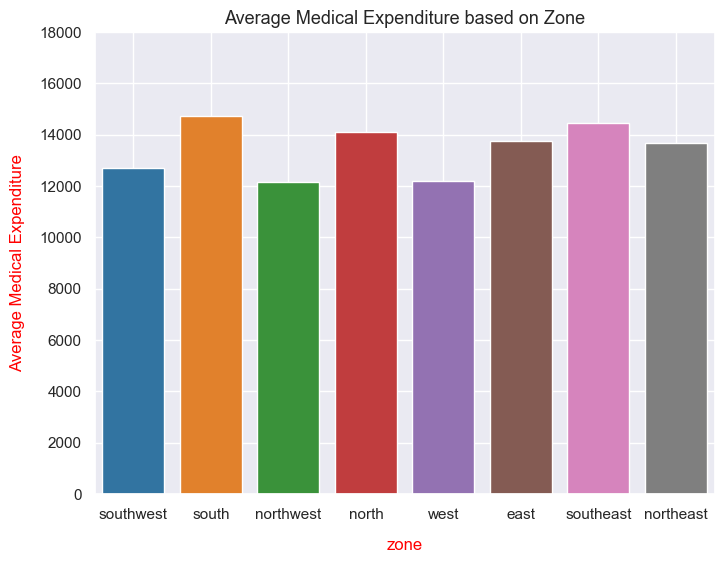

In [40]:
plt.figure(figsize=(8,6))

sns.barplot(data=df1,x='zone',y='expenditure',estimator=np.mean,ci=0)

plt.xlabel("zone",fontsize=12.0,color='r',labelpad=12)
plt.ylabel("Average Medical Expenditure",fontsize=12.0,color='r',labelpad=10)
plt.ylim(top=18000)

plt.title("Average Medical Expenditure based on Zone",fontsize=13.0)

plt.grid()
plt.show()

- On an average All zones are having more or less same expenditure

### `Bar chart to show smoking and alcoholic habits `
### `against average expenditure` 

In [41]:
g4 = df1.copy()

g4 = g4.groupby('smoke')['expenditure'].mean().round(2).reset_index()
g4.rename(columns={'expensiture':'avg_expenditure'},inplace=True)
g4

smoke  expenditure
0    no      8434.27
1   yes     32050.23

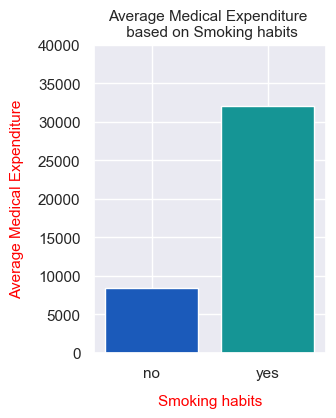

In [42]:
plt.figure(figsize=(3,4))

g = sns.barplot(data=g4,x='smoke',y='expenditure',estimator=np.mean,palette='winter',ci=0)

plt.xlabel("Smoking habits",fontsize=11.0,color='r',labelpad=10)
plt.ylabel("Average Medical Expenditure",fontsize=11.0,color='r',labelpad=10)
plt.ylim(top=40000)
plt.title("Average Medical Expenditure \n based on Smoking habits",fontsize=11.0)

plt.grid()
plt.show()

- Employees with smoking habits tend to increase the Average expenditure

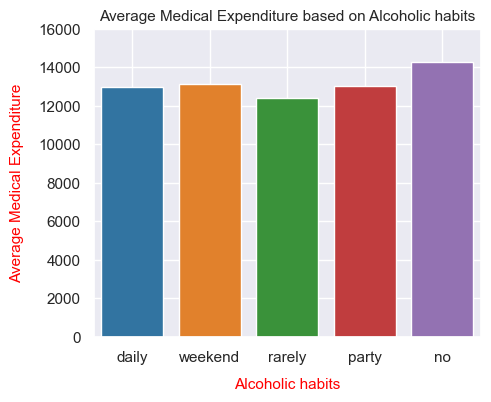

In [43]:
plt.figure(figsize=(5,4))

sns.barplot(data=df1,x='alcohol',y='expenditure',estimator=np.mean,ci=0)

plt.xlabel("Alcoholic habits",fontsize=11.0,color='r',labelpad=10)
plt.ylabel("Average Medical Expenditure",fontsize=11.0,color='r',labelpad=10)
plt.ylim(top=16000)
plt.title("Average Medical Expenditure based on Alcoholic habits",fontsize=11.0)

plt.grid()
plt.show()

### `pie chart to show distribution of frequency of alcohol consumption habits` 

In [44]:
df1.head()

id  age     sex     bmi bmi_category  dependent  alcohol smoke  \
0  i10012   19  female  27.900   overweight          0    daily   yes   
1  i10013   18    male  33.770   overweight          1  weekend    no   
2  i10014   28    male  33.000   overweight          3   rarely    no   
3  i10015   33    male  22.705          fit          0    daily    no   
4  i10016   32    male  28.880   overweight          0    party    no   

        zone  expenditure  
0  southwest  16884.92400  
1      south   1725.55230  
2      south   4449.46200  
3  northwest  21984.47061  
4  northwest   3866.85520

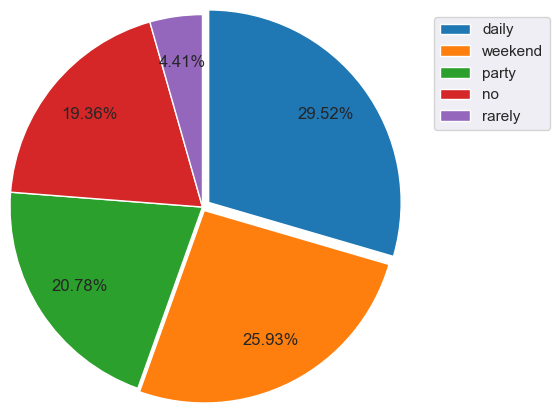

In [105]:
plt.figure(figsize=(8,5))
plt.pie(x=df1.alcohol.value_counts(),startangle=90,explode=[0.05,0.025,0,0,0],
        autopct='%0.2f%%',pctdistance=0.76,counterclock=False,radius=1.25)

plt.legend(df1.alcohol.value_counts().index,loc=(1.1,0.7))
plt.show()

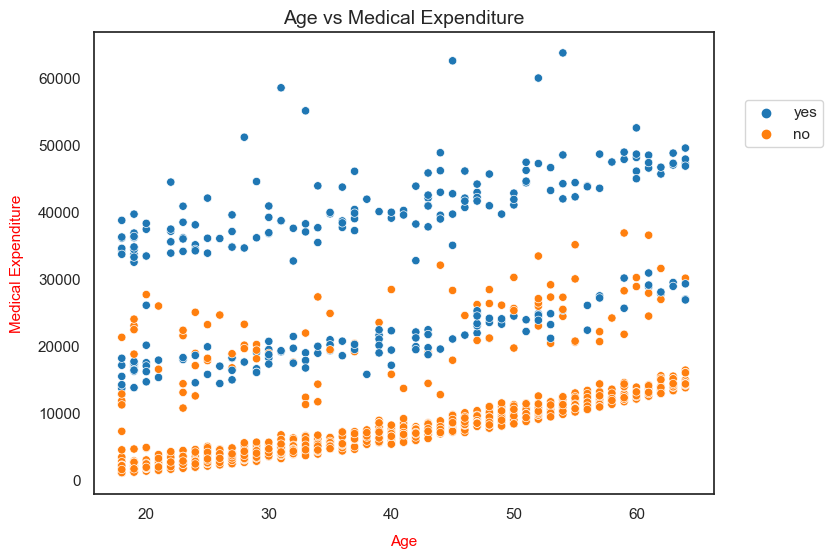

In [46]:
plt.figure(figsize=(8,6))

sns.set_style('white')
sns.scatterplot(data=df1,x='age',y='expenditure',hue='smoke')

plt.xlabel("Age",fontsize=11.0,color='r',labelpad=10)
plt.ylabel("Medical Expenditure",fontsize=11.0,color='r',labelpad=10)
plt.title("Age vs Medical Expenditure",fontsize=14.0)

plt.legend(loc=(1.05,0.75))
plt.show()

### `Distribution of Expenditure`

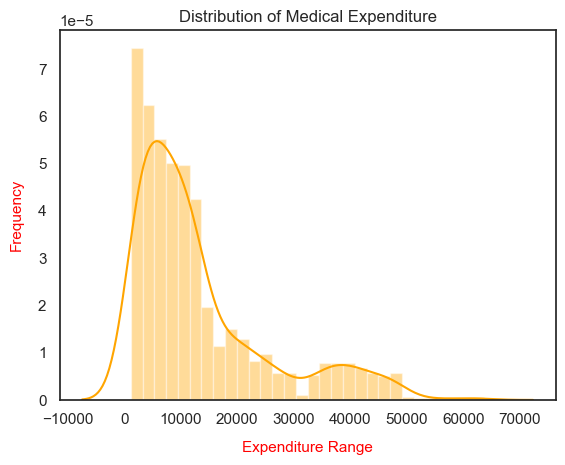

In [15]:
sns.distplot(a=df1.expenditure,color='orange')

plt.xlabel("Expenditure Range",fontsize=11.0,color='r',labelpad=10)
plt.ylabel("Frequency",fontsize=11.0,color='r',labelpad=10)
plt.title("Distribution of Medical Expenditure",fontsize=12.0)

plt.show()

- Most employees have expenditure in the range of 10,000 - 20,000

### `Pair Plot with respect to bmi-category `

<Figure size 2000x1500 with 0 Axes>

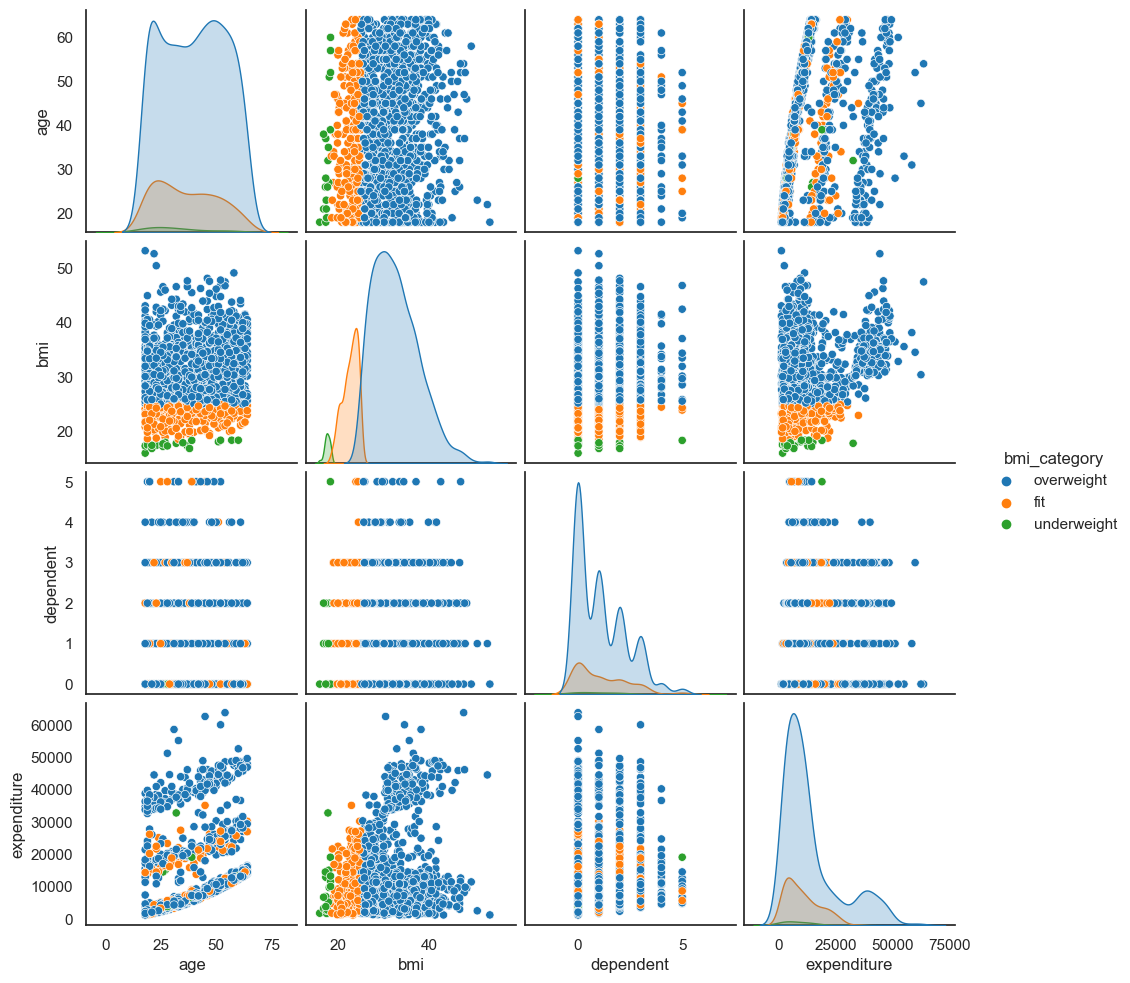

In [48]:
plt.figure(figsize=(20,15))

sns.pairplot(data=df1,kind='scatter',markers='o',hue='bmi_category')

plt.show()

## `Heat Map`

### `for understanding correlated varibles in data`

### `Correlation matrix`

In [49]:
df1.corr()

age       bmi  dependent  expenditure
age          1.000000  0.109272   0.042469     0.299008
bmi          0.109272  1.000000   0.012759     0.198341
dependent    0.042469  0.012759   1.000000     0.067998
expenditure  0.299008  0.198341   0.067998     1.000000

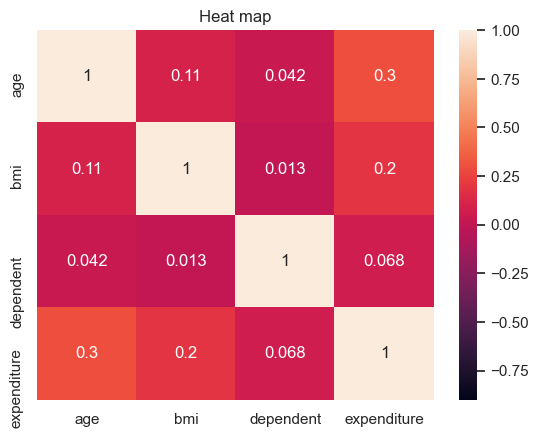

In [50]:
sns.heatmap(df1.corr(),annot=True,vmin=-0.9)

plt.title("Heat map")
plt.yticks()
plt.show()

- There does not exist much correlation among continous variables



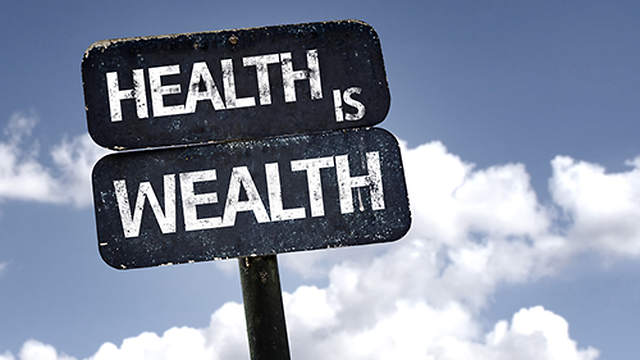

